<a target="_blank" href="https://colab.research.google.com/github/tuankhoin/CO3005-PPL/blob/main/Week_1_Introduction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Ho Chi Minh University of Technology (HCMUT)

CO3005 - Principles of Programming Languages

# Week 4 - OOP and Functional Programming

# Part 1: Object-Oriented Programming (OOP)

## 1. Why Object-Oriented Programming?

Object-Oriented Programming is a way of **structuring programs** as collections of *collaborating objects* rather than sequences of commands.

Core motivation:

* Manage **complexity** by decomposition
* Improve **reuse**, **extensibility**, and **maintainability**
* Model software closer to **real-world concepts**

In OOP, computation happens by **objects sending messages to each other**, not by manipulating global data.

---


## 2. Objects vs. Classes (Core Abstraction)

### Class

A **class** defines characteristics:

* the *attributes* (state)
* the *methods* (behavior)

Example (conceptual):

* Class: `Dog`
* Attributes: `furColor`, `age`
* Methods: `bark()`, `run()`

### Object

An **object** is an *instance* of a class.

* Class: `Dog`
* Object: `Lassie`

The distinction: **types exist at design time, objects exist at runtime**.

### Method vs Message

* Method: implementation of object's behavior
* Message: request sent to an object to invoke method

Example:

```
Method: bark()
Message: Lassie.bark()
```

This distinction comes from early OOP (Smalltalk) and helps explain **late binding** and **dynamic dispatch**.

---

## 3. Encapsulation & Information Hiding

### Encapsulation
* Attributes and operations ⟶ Single Unit (class, objects)
* Interaction via a single **public interface**

### Information Hiding
Controlled access: Internal representation is **not visible**
> Key benefit: Changes to implementation do **not** break client code.

This is identical in spirit to **Abstract Data Types (ADT)** studied earlier.
OOP generalizes ADTs by adding **inheritance and polymorphism**.


---

## 4. Class Hierarchy and Inheritance

Classes can be organized into **hierarchies**. Each can have subclasses and superclasses (0 to many).

```
Animal
 ├── Mammal
 │    ├── Dog
 │    └── Cat
 └── Fish
```

### Inheritance

A subclass:

* inherits non-private members of its superclass
* may **add** new behavior
* may **override** inherited behavior

Purpose:

* Code reuseability
* Behavioral specialization

Fact (don't need to know this for exam):
> Inheritance is usually described as a **semantic relationship** (“is-a”), not just code reuse. This distinction is stressed in MIT and Scala design guidelines.


In [ ]:
class Animal:
    def speak(self):
        print("Some sound")

class Dog(Animal):
    def speak(self):
        print("Woof")

d = Dog()
d.speak()

Woof


---

## 5. Multiple Inheritance - The Diamond Problem

When a class inherits from multiple parents:

```
    A
   / \
  B   C
   \ /
    D
```

Question:

> If both B and C define the same method, which one does D use?

This is the **Diamond Problem**.

Different languages solve it differently:

| Language       | Approach                  | Explanation                                                                 |
|----------------|---------------------------|-----------------------------------------------------------------------------|
| **Java**       | No multiple class inheritance | Java disallows multiple class inheritance. Interfaces can be used instead. |
| **C++**        | Virtual inheritance       | Allows multiple inheritance but resolves diamond problem by sharing a single base class instance. |
| **Scala / Python** | Linearization (MRO)       | Uses a method resolution order (MRO) to create a consistent linear path through the inheritance hierarchy. |


Next: How Scala and Python handle this ↓

---

## 6. Scala Handle: Trait Linearization

### Key idea

> Scala flattens the inheritance graph into a **linear chain**, evaluated **right to left**.

Rule (simplified, slide-friendly):

* The **last trait mixed in wins**
* Parents are ordered before children
* Each trait appears **once**

Example

```scala
trait A {
  def f(): String = "A"
}

trait B extends A {
  override def f(): String = "B"
}

trait C extends A {
  override def f(): String = "C"
}

class D extends B with C

(new D).f()   // returns "C"
```

**What is happening?**

* `C` is mixed in **after** `B`
* Linearization order (conceptually):

```
D → C → B → A
```


---

## 7. Python Handle: Method Resolution Order (MRO)

### Key idea

> Python computes a **single linear order** using **C3 Linearization** and searches methods **from left to right**.

C3 Rule (3 Constraints):
- Local precedence order → bases are respected in the order you write them (1st difference. Scala gives priority to last one)
- **Monotonicity** → subclass order cannot contradict parent order (Main difference to Trait Linearization, which would just overwrite)
- No duplication → each class appears exactly once


### Python example

```python
class X: pass
class Y: pass

class A(X, Y): pass
class B(Y, X): pass

class C(A, B): pass
```

Output:

```
TypeError: Cannot create a consistent method resolution order (MRO)
```

**Why?**

```css
X < Y   (from A)
Y < X   (from B)
```

This is impossible -> No linear ordering -> Reject
- Scala would just overwrite.


In [ ]:
!pip install graphviz

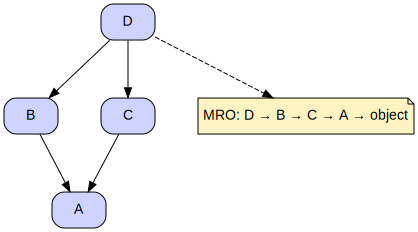

In [ ]:
# @title
from graphviz import Digraph

def draw_mro():
    dot = Digraph("MRO", format="png")
    dot.attr(rankdir="TB", nodesep="0.6", ranksep="0.8")
    dot.attr("node", shape="box", style="rounded,filled",
             fillcolor="#cfd3ff", fontname="Helvetica")

    # Classes
    dot.node("A", "A")
    dot.node("B", "B")
    dot.node("C", "C")
    dot.node("D", "D")

    # Inheritance edges
    dot.edge("B", "A")
    dot.edge("C", "A")
    dot.edge("D", "B")
    dot.edge("D", "C")

    # MRO order (visual hint)
    dot.node("mro", "MRO: D → B → C → A → object",
             shape="note", fillcolor="#fff3c4")
    dot.edge("D", "mro", style="dashed")

    return dot

draw_mro()


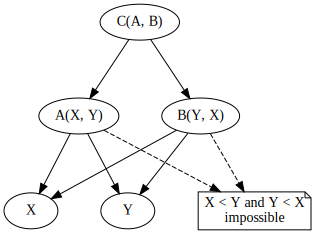

In [ ]:
# @title
from graphviz import Digraph

dot = Digraph("C3", format="png")
dot.attr(rankdir="TB", nodesep="0.6", ranksep="0.8")

# Nodes
dot.node("X"); dot.node("Y")
dot.node("A", "A(X, Y)")
dot.node("B", "B(Y, X)")
dot.node("C", "C(A, B)")

# Inheritance
dot.edge("A", "X"); dot.edge("A", "Y")
dot.edge("B", "Y"); dot.edge("B", "X")
dot.edge("C", "A"); dot.edge("C", "B")

# Conflict annotation
dot.node("conflict", "X < Y and Y < X\n❌ impossible", shape="note", fillcolor="#ffd6d6")
dot.edge("A", "conflict", style="dashed")
dot.edge("B", "conflict", style="dashed")

dot


Tip: Treat `⟶` as you would treat `>` in a mathematical equation. Like if `A > B` and `B > C` then `A > B > C`.

---

## 8. Polymorphism (One Interface, Many Behaviors)

When a subclass overrides a method:

* The method executed is chosen **at runtime**
* Based on the *actual object*, not the variable type

This is called **dynamic binding**.

Example (conceptual):

```text
Shape s = new Circle();
s.draw();   // calls Circle.draw(), not Shape.draw()
```

This behavior enables **polymorphism**
> Different objects can respond differently to the same message.


In [ ]:
class OII(Animal):
    def speak(self):
        print("Alo, em là Vũ phải không em?")

animals = [Dog(), OII(), Animal()]

for a in animals:
  print(f'What does the {a.__class__.__name__} say?')
  a.speak()
  print()

What does the Dog say?
Woof

What does the OII say?
Alo, em là Vũ phải không em?

What does the Animal say?
Some sound



---
# Part 2: Functional Programming

---

## 1. What Is Functional Programming?

Functional Programming is a **programming paradigm** where computation is performed by:

* evaluating **functions**
* avoiding **side effects**
* relying on **immutable data**

> Programs are built by *composing functions*, not by changing state.


---

## 2. Theoretical Foundation

* **Imperative languages**
  → Based on **Von Neumann architecture**
  → Focus on variables, assignments, machine state

* **Functional languages**
  → Based on **Lambda Calculus**
  → Focus on expression evaluation and transformation

Key contrast:

> FP models *what to compute*, not *how to mutate memory*.


---

## 3. Functions as Values (First-Class Functions)

In FP, **functions are values**. They can be:

* anonymous (lambda expressions)
* assigned to variables
* passed as parameters
* returned as results
* created dynamically

Example idea:

```
f = x => x + 1
f(3) = 4
```

This is the cornerstone of FP.

---

## 4. Lambda Expressions

A **lambda expression** defines an anonymous function.

Mathematical form:

```
λ(x) x * x * x
```

Programming meaning:

* parameters + expression
* no name
* no statements, only expressions

Used heavily in **higher-order functions**.


In [ ]:
l_func = lambda x: x + 1

## 5. Higher-Order Functions (HOF)

A **higher-order function**:

* takes functions as arguments, or
* returns a function

Common functional forms:

* function composition
* apply-to-all (map)
* filter
* forall / exists
* fold (reduce)
* closures

These replace loops and mutable control flow.


---

## 6. Function Composition

Function composition combines functions:

```
(f ∘ g)(x) = f(g(x))
```

Meaning:

* output of `g` becomes input of `f`

This promotes **pipeline-style computation**.


In [ ]:
g_u = lambda x: x * 2 + 1
f_u = lambda x: x * 3 + 1
fog_u = lambda x: f_u(g_u(x))

fog_u(69)

---

## 7. Apply-to-All (map)

`map` applies a function to every element of a list.

Concept:

```
map(f, [x1, x2, ..., xn])
→ [f(x1), f(x2), ..., f(xn)]
```

Key idea:

> No loops, no mutation — only transformation.


In [ ]:
a = [1,6,9,36,69]
b = map(lambda x: x * 2 + 1, a)
list(b)

---

## 8. Predicate-Based Forms: filter, forall, exists

* **filter** → keep elements that satisfy a predicate
* **forall** → check if predicate holds for all elements
* **exists** → check if predicate holds for at least one element

These replace conditional loops with **declarative logic**.


In [ ]:
is_foreign = lambda x: x == 36

a = [1,6,9,36,69]

# filter
b = filter(is_foreign, a)
print(list(b))

c = list(map(is_foreign, a))

# forall
print(all(c))

# exists
print(any(c))

[36]
False
True


---

## 9. Fold / Reduce (Insert-Left, Insert-Right)

`fold` collapses a collection into a single value.

Concept:

```
fold(f, init, [x1, x2, x3])
→ f(f(f(init, x1), x2), x3)
```

Used for:

* summation
* product
* aggregation
* building new structures

In [ ]:
# Python 3.8+
items = [1, 2, 3, 4, 5]
f = lambda acc, x: acc * x
accumulator = 1

[accumulator := f(accumulator, x) for x in items]
accumulator


120

---

## 10. Functions as Parameters

Functions can be passed to user-defined functions. Behavior becomes data.

This enables:

* customizable computation
* reusable control patterns
* abstraction over *how* work is done

In [ ]:
def apply_func(f: callable, x: int):
  return f(x)

apply_func(lambda x: x * 2 - 3, 36)

69

---

## 11. Closures

A **closure** is:

> a function + its surrounding environment

Key property:

* free variables are **remembered** even after the outer function returns

This enables:

* function factories
* partial application
* encapsulated behavior


In [ ]:
# The lambda way
power = lambda exp: lambda x: x ** exp

# The equivalent normal way that is easier to look
def power_f(exp):
  return lambda x: x ** exp

square = power(2)
cube = power(3)

square(36), cube(36)

(1296, 46656)

---

## 12. Currying & Partial Application

Currying transforms:

```
f(x, y) → f(x)(y)
```

Benefits:

* create specialized functions
* improve composability
* reduce boilerplate

This is common in FP-oriented languages like Scala and Haskell. This is because they used juxtaposition as function indicator, which looks elegant:

```haskell
f 1 2 3 4 5
```

In [ ]:
# Ugly AF in Python
def f(a):
    def g(b):
        def h(c):
            def i(d):
                def j(e):
                    print(a, b, c, d, e)
                return j
            return i
        return h
    return g

f(1)(2)(3)(4)(5)

1 2 3 4 5


---

## 13. Immutability

Immutable data **cannot be changed after creation**.

Principle:

* **never modify** existing data
* results are always returned as **new** values

Why this matters:

* easier reasoning
* safer concurrency
* no hidden side effects

Pure FP avoids mutation entirely.

---

## 14. Immutable Data Structures

Examples of immutable data:

* numbers, booleans
* strings
* tuples
* ranges
* frozenset
* namedtuple

Even when using mutable structures:

> Prefer immutable *operations* over in-place mutation.

In [ ]:
message = "Khô gà"

# Concatenation creates a new string object
new_message = message + " Đè Tem"

print(f"Original message: {message}")
print(f"New message: {new_message}")
print(f"Original ID: {id(message)}")
print(f"New ID: {id(new_message)}")
# The IDs will be different


Original message: Khô gà
New message: Khô gà Đè Tem
Original ID: 133620743697504
New ID: 133620763633840


In [ ]:
wc_champion = '10'
try:
  wc_champion[0] = 7
except TypeError as e:
  print(e)

'str' object does not support item assignment


---

## 15. Decorators (Control Abstraction)

Decorators:

* modify function behavior
* without changing the original function

They are:

* higher-order functions
* a form of **control abstraction**

Used for:

* logging
* timing
* access control

In [ ]:
def anh_7(func):
    def wrapper(*args, **kwargs):
        print("Vấp cỏ -> Pen!!!")
        func(*args, **kwargs)
        print("Siuuuuu")
    return wrapper

@anh_7
def goal(count):
    print(f'Goal number {count} scored!')

# Calling the decorated function
goal(650)

Vấp cỏ -> Pen!!!
Goal number 650 scored!
Siuuuuu


Some common Python decorators:
- `classmethod`
- `staticmethod`
- `dataclass` is a very powerful decorator for database storage (see [why](https://stackoverflow.com/a/47955313))

---

## 16. Why Functional Programming?
This is a style of programming that avoids side effects by:
- performing computation through the evaluation of pure functions
- relying heavily on immutable data structures

Benefits:

* easier to reason about
* easier to test
* fewer bugs
* safer parallelism
* clearer intent

Trade-off:

* sometimes less efficient on traditional hardware
* requires different thinking than imperative style

---

## Paradigms (Scala & Python)

Modern languages are **multi-paradigm**:

* Scala: OOP + Functional Programming
* Python: OOP + procedural + functional features

| Syntax / Pattern | Example                                  | Meaning                                             | Typical Use                                 |
| ---------------- | ---------------------------------------- | --------------------------------------------------- | ------------------------------------------- |
| `@classmethod`   | `@classmethod def from_str(cls, s): ...` | Method bound to the **class**, not instance (`cls`) | Alternative constructors, factory methods   |
| `@staticmethod`  | `@staticmethod def util(x): ...`         | Function namespaced inside class, **no self / cls** | Helper functions logically related to class |
| `__privateVar`   | `self.__balance`                         | **Name-mangled** to `_ClassName__balance`           | Prevent accidental override in subclasses   |
| `_hiddenVar`     | `self._cache`                            | **Protected by convention**                         | Internal implementation detail              |
| `__init__`       | `def __init__(self):`                    | Object constructor                                  | Initialize object state                     |
| `__str__`        | `def __str__(self):`                     | Human-readable string                               | `print(obj)`                                |
| `__repr__`       | `def __repr__(self):`                    | Debug / unambiguous representation                  | REPL, debugging                             |
| `__eq__`         | `def __eq__(self, other):`               | Equality comparison                                 | `==` operator                               |
| `__lt__`         | `def __lt__(self, other):`               | Less-than comparison                                | Sorting                                     |
| `__call__`       | `def __call__(self):`                    | Makes object callable                               | Function-like objects                       |
| `@property`       | `@property def x(self):`                 | Computed attribute                                  | Encapsulation without getters               |
| `@x.setter`      | `@x.setter def x(self, v):`              | Attribute assignment hook                           | Validation                                  |
| `super()`        | `super().method()`                       | Call parent implementation                          | Cooperative inheritance                     |
| `Class.mro()`    | `MyClass.mro()`                          | Method Resolution Order                             | Debug multiple inheritance                  |
| Duck typing      | `obj.method()`                           | Behavior-based typing                               | Polymorphism without inheritance            |
| ABC              | `class A(ABC):`                          | Abstract base class                                 | Enforced interface                          |
